In [1]:
# import pandas , numpy , matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# change working directory
import os
os.getcwd()
os.chdir('/Users/hoeunsin/PerfectGuide-master/Data/diabetes/')

In [5]:
# read csv
d = pd.read_csv('diabetes.csv')

In [7]:
# head
d.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [8]:
# info
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# describe
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# NA check
d.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
# distribution
features = d.columns[d.columns!='Outcome']
len(features)

8

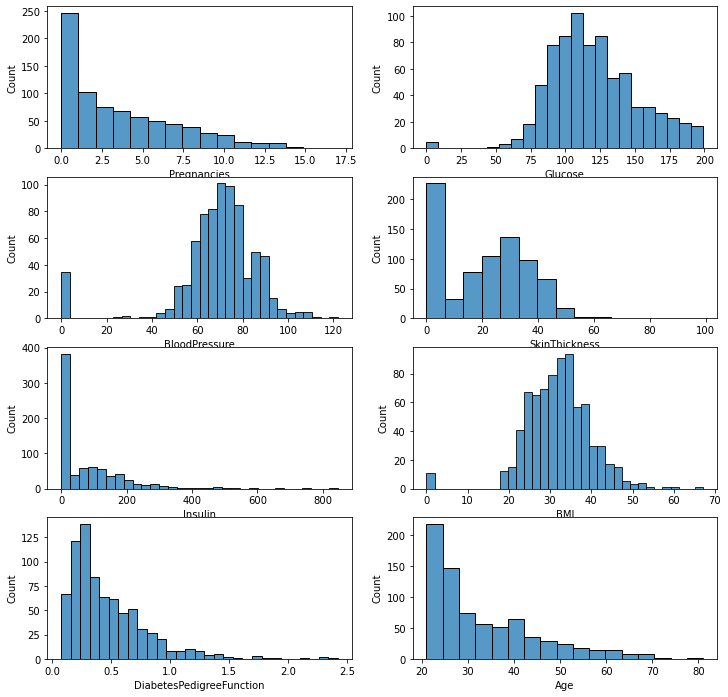

In [17]:
# figure
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12,12))

for i , ax in zip(range(0,8), axes.flat):
    sns.histplot(data=d, x=features[i], ax=ax)

In [30]:
# replace zeros
d[features]= d[features].replace(0, d[features].mean())

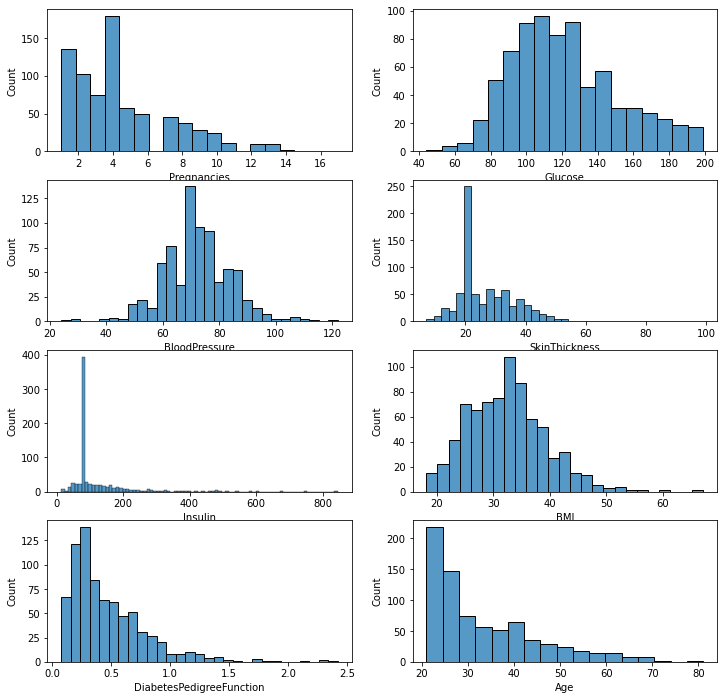

In [31]:
# distribution after replace zeros
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(12,12))

for i , ax in zip(range(0,8), axes.flat):
    sns.histplot(data=d, x=features[i], ax=ax)

In [33]:
# feature, label 
features = d.drop('Outcome', axis=1)
label = d.loc[:,'Outcome']

In [45]:
# StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
X_scaled.shape

(768, 8)

In [46]:
# Train_Test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled ,  label, test_size=0.2, random_state=156, stratify = label)

In [47]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')

In [48]:
# fitting
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [49]:
# predicting
pred = lr.predict(X_test)

In [51]:
# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

In [53]:
# get scores function
def get_scores(y_test, pred, pred_proba_1):
    con = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba_1)
    
    print('Confusion Matrix : \n{}'.format(con))
    print('Accuracy Score : {:.4f}'.format(acc))
    print('Precision Score : {:.4f}'.format(pre))
    print('Recall Score : {:.4f}'.format(rec))
    print('F1 Score : {:.4f}'.format(f1))
    print('ROC_AUC Score : {:.4f}'.format(roc_auc))

In [56]:
# get scores
pred_proba_1 = lr.predict_proba(X_test)[:,1]

get_scores(y_test, pred, pred_proba_1)

Confusion Matrix : 
[[89 11]
 [20 34]]
Accuracy Score : 0.7987
Precision Score : 0.7556
Recall Score : 0.6296
F1 Score : 0.6869
ROC_AUC Score : 0.8452


In [78]:
# precision_recall curve
def p_r_curve(y_test, pred_proba_1):
    pre, rec ,  thr = precision_recall_curve(y_test, pred_proba_1)
    plt.figure(figsize=(10,6))
    plt.plot(thr, pre[0:thr.shape[0]], label='precision', linestyle='--')
    plt.plot(thr, rec[0:thr.shape[0]], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold Value'); plt.ylabel('Precision & Recall Value')
    plt.legend() ; plt.grid()
    plt.show()

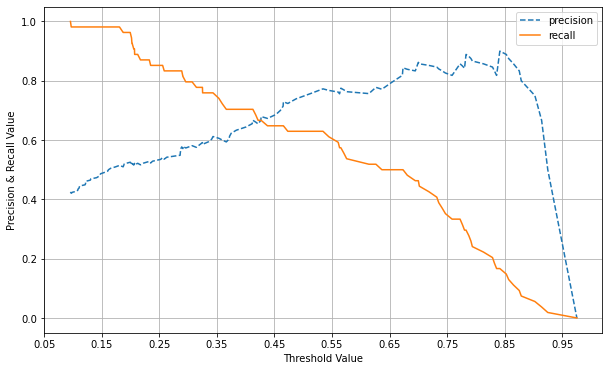

In [79]:
# precision recall curve plot
p_r_curve(y_test, pred_proba_1)

### < Key Point >
* 정확도(Precision)는 0.75 이상이지만, 재현율(Recall)은 0.63정도로 낮음
* 정확도는 적게 떨어지지만 재현율을 높이는 임곗값 탐색 필요
* 재현율을 높여야 하기 때문에 임계값은 0.45보다 작은 값이어야 함
* 정확도가 0.6 이상은 되어야 하기 때문에 임계값은 0.3 이상이어야 함

In [131]:
# threshold
thresholds = np.round(np.arange(0.3, 0.5, 0.01),2)
thresholds

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49])

In [132]:
# Binarizer
from sklearn.preprocessing import Binarizer

In [133]:
pred_proba_1.reshape(-1,1).shape

(154, 1)

In [134]:
binarizer = Binarizer(threshold=0.4)
binarizer.fit(pred_proba_1.reshape(-1,1))
c_pred = binarizer.transform(pred_proba_1.reshape(-1,1))

In [136]:
def get_scores_thr(y_test, pred_proba_1, thresholds):
    
    for i, thr in enumerate(thresholds):
        binarizer = Binarizer(threshold = thr)
        binarizer.fit(pred_proba_1.reshape(-1,1))
        c_pred = binarizer.transform(pred_proba_1.reshape(-1,1))
        print('\n##### {}'.format(i+1))
        print('Threshold : {}'.format(thr))
        get_scores(y_test,c_pred, pred_proba_1)

In [137]:
get_scores_thr(y_test, pred_proba_1, thresholds)


##### 1
Threshold : 0.3
Confusion Matrix : 
[[69 31]
 [11 43]]
Accuracy Score : 0.7273
Precision Score : 0.5811
Recall Score : 0.7963
F1 Score : 0.6719
ROC_AUC Score : 0.8452

##### 2
Threshold : 0.31
Confusion Matrix : 
[[69 31]
 [12 42]]
Accuracy Score : 0.7208
Precision Score : 0.5753
Recall Score : 0.7778
F1 Score : 0.6614
ROC_AUC Score : 0.8452

##### 3
Threshold : 0.32
Confusion Matrix : 
[[71 29]
 [12 42]]
Accuracy Score : 0.7338
Precision Score : 0.5915
Recall Score : 0.7778
F1 Score : 0.6720
ROC_AUC Score : 0.8452

##### 4
Threshold : 0.33
Confusion Matrix : 
[[72 28]
 [13 41]]
Accuracy Score : 0.7338
Precision Score : 0.5942
Recall Score : 0.7593
F1 Score : 0.6667
ROC_AUC Score : 0.8452

##### 5
Threshold : 0.34
Confusion Matrix : 
[[73 27]
 [13 41]]
Accuracy Score : 0.7403
Precision Score : 0.6029
Recall Score : 0.7593
F1 Score : 0.6721
ROC_AUC Score : 0.8452

##### 6
Threshold : 0.35
Confusion Matrix : 
[[74 26]
 [14 40]]
Accuracy Score : 0.7403
Precision Score : 0.6061
Re

In [138]:
# threshold 0.48
binarizer = Binarizer(threshold = 0.48)

binarizer.fit(pred_proba_1.reshape(-1,1))

c_pred = binarizer.transform(pred_proba_1.reshape(-1,1))

In [144]:
# scores
get_scores(y_test, c_pred, pred_proba_1)

Confusion Matrix : 
[[88 12]
 [20 34]]
Accuracy Score : 0.7922
Precision Score : 0.7391
Recall Score : 0.6296
F1 Score : 0.6800
ROC_AUC Score : 0.8452
